In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# The Data Analytics Process walkthrough

## Objectives

* Review the CRISP-DM process and its relation to the Data Science Lifecycle\
* Do a walkthrough example of this process with a relevant dataset

## CRISP-DM

Recall that the Data Analytics/Data Science project cycle discussed in our last class. It is an open standard approach or process that describes common approaches used by data professionals and data mining experts. For us, as analysts, it is an adaptation or iteration of the CRISP-DM or CRoss Industry Standard Process for Data Mining model which includes in it process related to the statistical modeling of data and deployment of those models or algorithms in professional environments.

![](./images/crisp-dm.png)

Because we havent yet dealt with statistical models / algorithms just yet, our process is a broaded to a general lifecycle concerned with building domain knowledge through data exploration, data visualization so that we may provide solutions to a business problem, recommendations to a stakeholder or deeper insight into a particular domain for its own sake. 

## The Data Science/Analytics Life Cycle

![](./images/ds_lifecycle.png)

## 1.) Business understanding : Building Domain knowledge.

* **How much or how many?** 
  * E.g. Distributions of variables. Simple counts or aggregate statistics (mean, median, mode,    variance, categorical counts (pd.DataFrame.value_counts() )


* **Which category?**
  * E.g. “what group(s) am I interested in” “what metrics or features are of importance?”


* **Which Group?**
  * E.g creating a number of groups (segments) of your customers based on their monetary or domain value.


* **Is this weird?** 
    * E.g. Through visualization, observing strange effects in data: does revenue not track inventory -> could be a loss prevention/theft issue. Overall signals in the data that aren’t what one would expect or require further investigation.


* **Which items would a customer/user/stakeholder prefer?**
    * E.g “What recommendations can I make to existing customers or stakeholders”


### **Business case/question:**
Suppose your stakeholders would like to know generally, how their stores are performing across the USA and how their sales and profit are tracking.

In [32]:
df =  pd.read_csv('superstore.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [34]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Cleaning

There isnt a lot of data cleaning required here as this dataset has been carefully curated. Here is an example of a simple data cleaning measure one might take

In [49]:
# the column headers are all capitalized which makes accessing them slightly harder. I like to lower them while
# while i perform analysis/visualization.

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('-','_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [50]:
df.region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: region, dtype: int64

In [51]:
df.country.value_counts()

United States    9994
Name: country, dtype: int64

In [52]:
df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

## Data Visualization:

### The Histogram: _Understanding Typical Values and Spread in our Numerical Data_

Our numerical data here is rather simple and make perfect candidates for our success metrics.

In [73]:
# Firstly lets get only the subset of data we are interested in at the moment.
df_dist = df[['sales','profit']]

/Users/lotuschild132/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lotuschild132/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


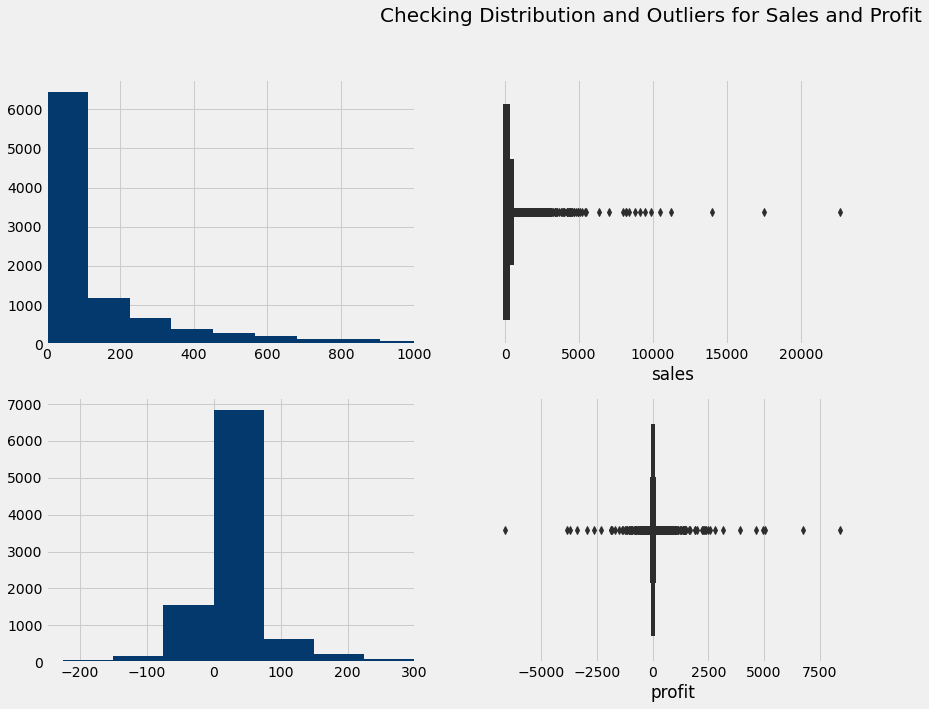

In [74]:
# initialize our plot space.
plt.figure(figsize=[20,10])
plt.suptitle("Checking Distribution and Outliers for Sales and Profit", size=20)

# sistogram for sales
plt.subplot(2,3,1)
plt.hist(df_dist['sales'], bins=200, color='#03396c')
plt.xlim(0,1000)

# boxplot for sales
plt.subplot(2,3,2)
sns.boxplot(df_dist['sales'], color='#b3cde0')

# histogram for profit
plt.subplot(2,3,4)
plt.hist(df_dist['profit'], bins=200, color='#03396c')
plt.xlim(-250,300)

# Boxplot for profit
plt.subplot(2,3,5)
sns.boxplot(df_dist['profit'], color='#b3cde0')


plt.show()

The boxplots look a bit compressed. We can see the presence of many outliers here which affects the scale of out plot. If we subselect as many of the outliers to not include our data, we can better visualize the data in the IQR etc

In [75]:
# Subselecting the data so that the Outliers dont not compress the scale 

'''
Notice that the data is being cut off here so that we can see certain details better. this is particular to the 
data we have sectioned off for plotting of the histogram. In general you want to be very careful around including/
excluding outliers in your data and have good reasons for doing so, since these outliers may be relevant to 
the summary statistics and what conclusions we draw from them.
'''

df_dist = df_dist[df_dist['sales'] <= 2000]
df_dist = df_dist[df_dist['profit'] <= 2000]
df_dist = df_dist[df_dist['profit'] >= -200]

/Users/lotuschild132/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lotuschild132/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


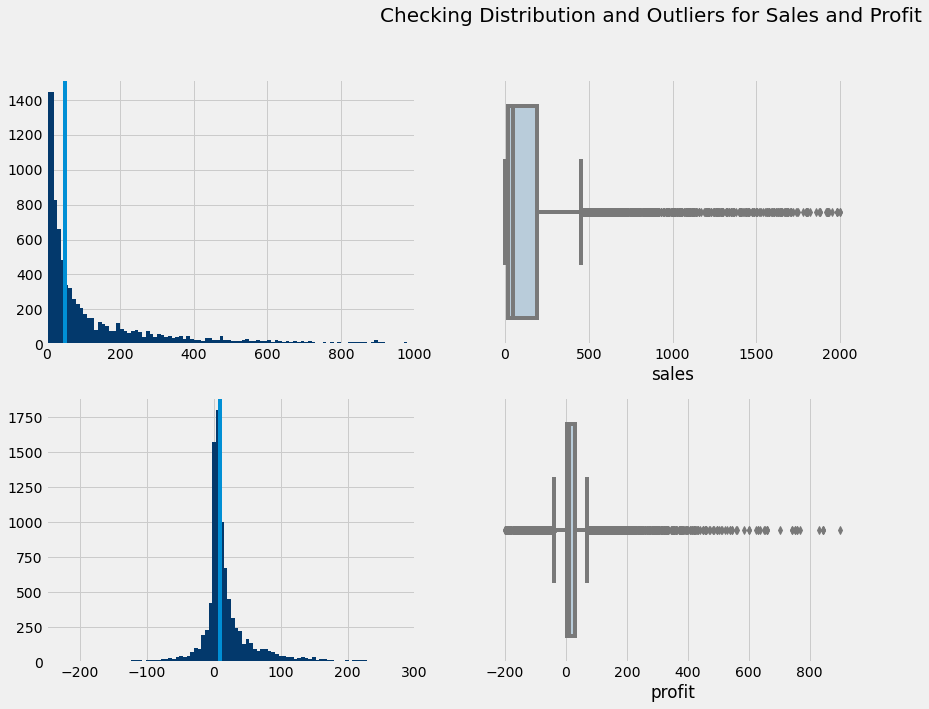

In [84]:
# initialize our plot space.
plt.figure(figsize=[20,10])
plt.suptitle("Checking Distribution and Outliers for Sales and Profit", size=20)

# sistogram for sales
plt.subplot(2,3,1)
plt.hist(df_dist.sales, bins=200, color='#03396c')
plt.axvline(df_dist.sales.median())
plt.xlim(0,1000)

# boxplot for sales
plt.subplot(2,3,2)
sns.boxplot(df_dist.sales, color='#b3cde0')

# histogram for profit
plt.subplot(2,3,4)
plt.hist(df_dist.profit, bins=200, color='#03396c')
plt.axvline(df_dist.profit.median())
plt.xlim(-250,300)

# Boxplot for profit
plt.subplot(2,3,5)
sns.boxplot(df_dist.profit, color='#b3cde0')



plt.show()

**Add your conclusions Below:**

### The Bar Chart : _Comparing Numerical and Categorical Values_

In our case, `sales` is a good numerical feature and `region` are a good categorical feature. Therefore, a Bar Chart is the best visualization to convey insights here. This is because, with Bar Charts, you can show your Categorical Features on one of the axis and the Aggregration of your Numerical Features on the other.

In [17]:
# lets make a bar chart for the data in question. 

# first lets subselect the data we would like to plot
df_bar = df[['region','sales']]

In [19]:
# Lets aggregate the data and format it so that it plots nicely 
df_bar = df_bar.groupby('region').mean().sort_values(by='sales', ascending=False)

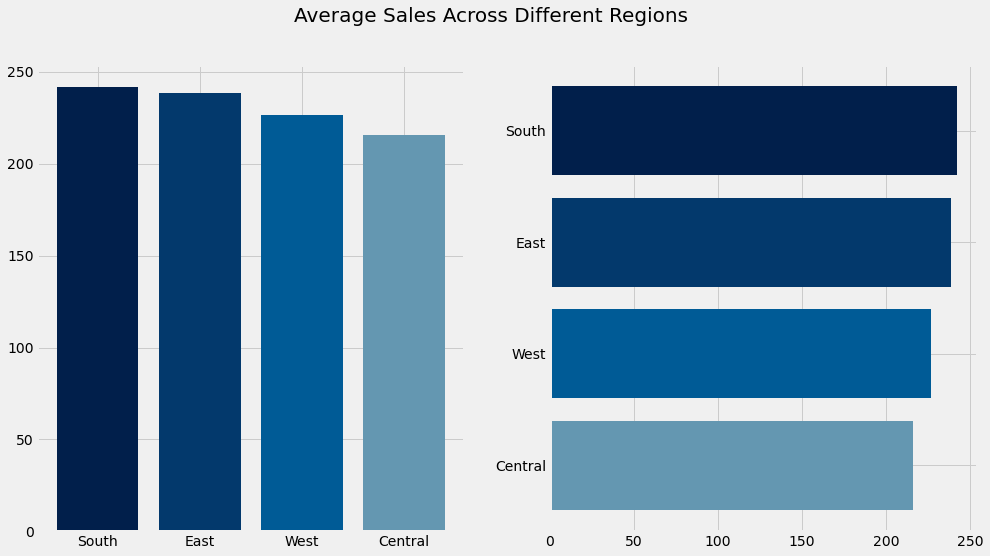

In [22]:
# Setting the figure size
plt.figure(figsize=[15,8]) 

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.subplot(1,2,1)
plt.bar(x=df_bar.index, height='sales', color = ['#011f4b','#03396c','#005b96','#6497b1'], data=df_bar)

# Plotting the Horizontal BarChart (Use this if there are many unique values for a Categorical Feature)
plt.subplot(1,2,2)
plt.barh(y=df_bar.index, width='sales',color = ['#011f4b','#03396c','#005b96','#6497b1'], data=df_bar)
plt.gca().invert_yaxis() # Inverting the Y Axis

plt.show()

* it is always better to display the values in the BarChart in an order(preferably highest to lowest).

* You can further improve this plot by adding annotations for each of the bars. What I mean by that is, to show "Sales" values on top of each Bar. (consider using plt.text())

* **Both bar charts convey the same insights. A horizontal bar chart is preferable when the number of unique values in the categorical feature is large.**

### The Line Plot: _Visualizing changes over time_

It might be sensible to understand the behavior of sales over time. This kind of metric will allow us to see if there are any times of year to focus company efforts to increase sales where needed. Also it will allow us to have a more complete understanding of the market dynamic considered here.

When visualizing data over time a line chart is best because it allows us to see trends through time and the data points connected hints at a dependency from one point to the next. As always, remember that **independent variables** go on the x-axis or the horizontal axis. **Dependent variables** go on the y-axis or the vertical axis. What does this mean?? it means that we suppose that whatever is affected by another variable goes on the y and what is doing the affecting goes on the x.

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Notice that we have two numerical features that would be useful to plot together: `sales` and `profit`

In [55]:
df.order_date.head()

0     11/8/2016
1     11/8/2016
2     6/12/2016
3    10/11/2015
4    10/11/2015
Name: order_date, dtype: object

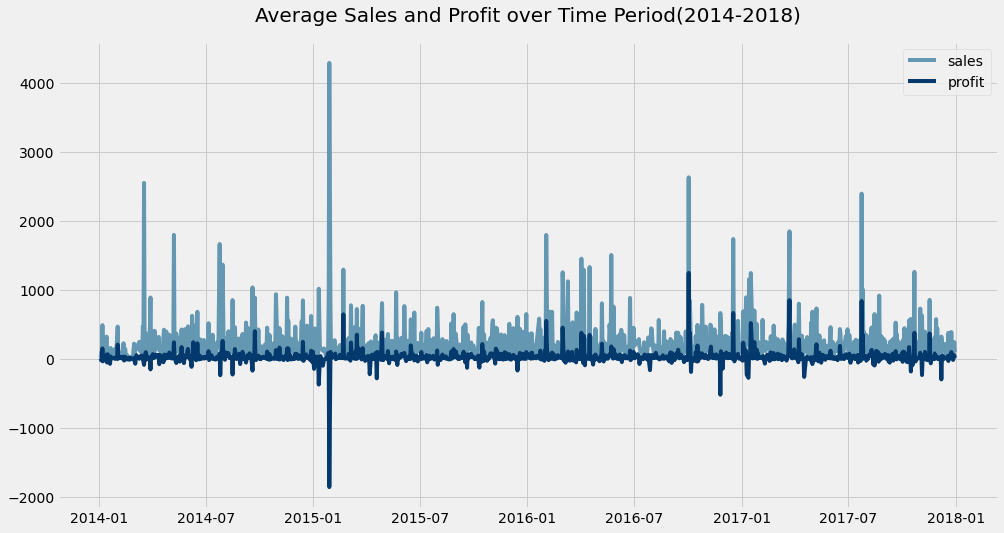

In [61]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = df[['order_date','sales','profit']].sort_values('order_date') # Chronological Ordering
df_line['order_date'] = pd.to_datetime(df_line['order_date']) # Converting into DateTime
df_line = df_line.groupby('order_date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'sales', data=df_line, color='#6497b1') # Avg Sales over Time
plt.plot(df_line.index, 'profit', data=df_line, color='#03396c') # Avg Profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)
plt.legend()
plt.show()

* It is always better to display values in a line plot in a chronological order.

* You can further improve this plot by adding annotations for a certain event in the timeline to catch the audiences or stakeholders attention.

**Add conclusions here:***

### The Scatter Plot: _Relationships between Numerical Features_

Lets continue to inspect our numerical features: `sales` and `profit` and see how they are related and if any correlation may be present. We also have data that can be encoded in our scatterplot to give us a more detailed picture of the relationships at play between these variables. this is the `segment` feature

In [85]:
df.segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

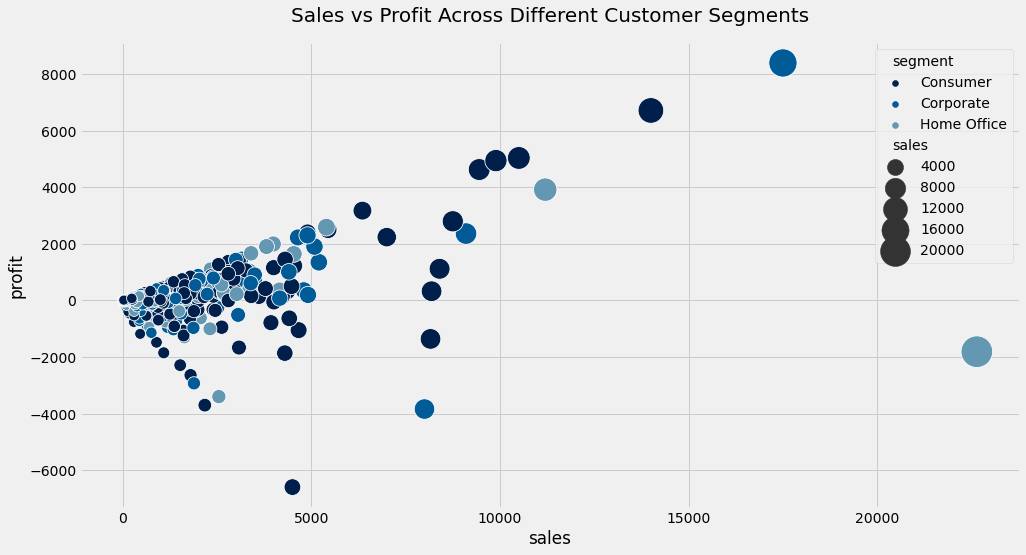

In [90]:
# lets subselect the data we're interested in plotting
df_scatter = df[['sales','profit','segment']]

# Create the figure space for our scatter plot.
plt.figure(figsize=[15,8])

# Profit in the Y axis (), and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter.sales, y=df_scatter.profit, hue=df_scatter.segment, palette=['#011f4b','#005b96','#6497b1'], size=df_scatter.sales, sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

**Add your conclusions here:**

What other questions might we ask to help our stakeholders know more about their company success and where they might consider applying resources? lets take another look at the columns

In [91]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [92]:
df.category

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: category, Length: 9994, dtype: object

In [93]:
df.ship_mode

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: ship_mode, Length: 9994, dtype: object

Maybe we can visualize sales and profit against `ship mode`... because `sales` and `profit` are numerical and would be dependent on the shipping mode... this is a hint to plot sales/profit on the y-axis and shipping mode on the x-axis. A stacked bar chart would be a nice choice here:

In [95]:
# Take a subset of the data we want to visualize.
df_stackb = df[['ship_mode','sales','profit']]

# Lets aggreggate sales and profit by ship_mode
df_stackb = df_stackb.groupby(['ship_mode']).sum().reset_index()


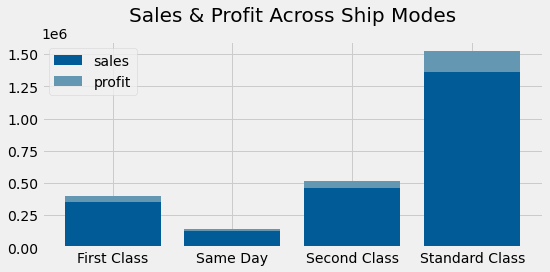

In [101]:
# Plot a stacked bar chart
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
plt.bar(x=df_stackb.ship_mode, height=df_stackb.sales, color='#005b96')
plt.bar(x=df_stackb.ship_mode, height=df_stackb.profit, bottom=df_stackb.sales, color='#6497b1')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['sales','profit'])

**Add conclusion here:**

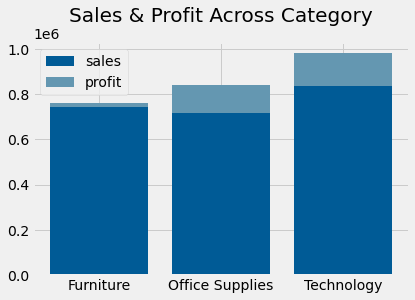

In [104]:
df_sbar = df[['sales','profit','category']]
            
df_sbar = df_sbar.groupby(['category']).sum().reset_index()

plt.bar(x=df_sbar.category, height=df_sbar.sales, color='#005b96')
plt.bar(x=df_sbar.category, height=df_sbar.profit, bottom=df_sbar.sales, color='#6497b1')
plt.title("Sales & Profit Across Category", size=20, pad=20)
plt.legend(['sales','profit'])
             